In [7]:
import pandas as pd
import numpy as np
import folium
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from geopy.geocoders import Nominatim


In [8]:
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.datasets.samples_generator import make_blobs 
import seaborn as sns
%matplotlib inline

<h1>Doing exploration on South Korea's COVID-19 data</h1>

In [102]:
#  https://www.kaggle.com/kimjihoo/coronavirusdataset?select=Case.csv 
locationDF = pd.read_csv('case.csv')
locationDF.shape


(174, 8)

In [113]:
genderDF = pd.read_csv('TimeGender.csv')
genderDF.head()

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


In [172]:
patDF = pd.read_csv('PatientInfo.csv')
patDF.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [115]:
patDF.shape

(5165, 14)

In [64]:
#this will make charts look CLASSY
sns.set(style="darkgrid")


# Explore some of the data; a significant amount of cases are caused by direct contact it seems

Text(0,0.5,'Number of cases')

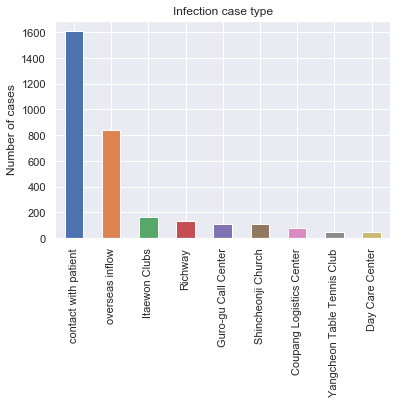

In [128]:
top10 = patDF.infection_case.value_counts().head(10)
top10.drop('etc', inplace=True)
top10.plot(kind='bar')
plt.title('Infection case type')
plt.ylabel('Number of cases')

In [163]:
patDF.sex.value_counts()[0]/patDF.sex.value_counts()[1]
patDF.age.value_counts()

20s     899
50s     667
30s     523
40s     518
60s     482
70s     232
10s     178
80s     170
0s       66
90s      49
100s      1
Name: age, dtype: int64

In [160]:
menFat = patDF.loc[patDF['state'] == 'deceased', 'sex'].value_counts()[0]/patDF.sex.value_counts()[1]
wmenFat = patDF.loc[patDF['state'] == 'deceased', 'sex'].value_counts()[1]/patDF.sex.value_counts()[0]
menFat

0.025753424657534246

In [153]:
patDF.loc[patDF['state'] == 'deceased', 'sex'].value_counts()[0]/patDF.loc[patDF['state'] == 'deceased', 'sex'].value_counts()[1]

1.6785714285714286

In [164]:
patDF.loc[patDF['state'] == 'deceased', 'age'].value_counts()[0]/170

0.14705882352941177

In [165]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

# Although more women contracted COVID-19, more men died from COVID-19 than women.

Text(0,0.5,'cases')

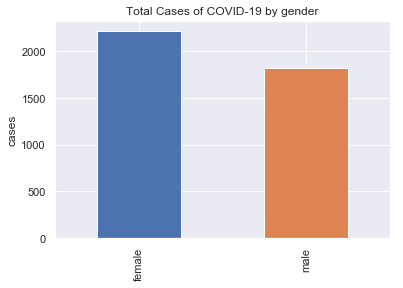

In [166]:
patDF.sex.value_counts().plot(kind='bar')

plt.title('Total Cases of COVID-19 by gender')
plt.ylabel('cases')

Text(0,0.5,'death count')

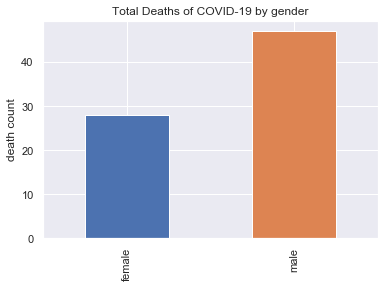

In [167]:
patDF.loc[patDF['state'] == 'deceased', 'sex'].value_counts().reindex(['female', 'male']).plot(kind='bar')

plt.title('Total Deaths of COVID-19 by gender')
plt.ylabel('death count')

Text(0.5,0,'Age group')

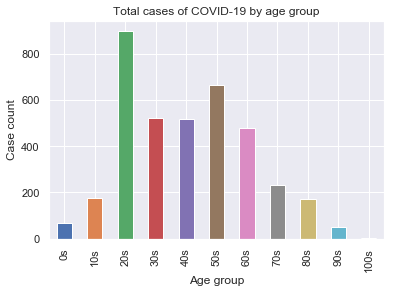

In [117]:
patDF.age.value_counts().reindex(ages, fill_value = 0).plot(kind='bar')
plt.title('Total cases of COVID-19 by age group')
plt.ylabel('Case count')
plt.xlabel('Age group')

Text(0.5,0,'Age group')

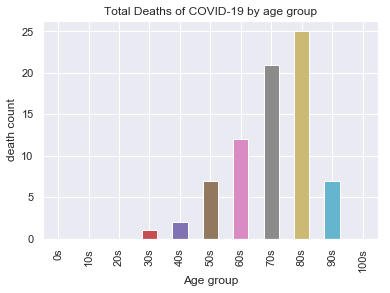

In [118]:
patDF.loc[patDF['state'] == 'deceased', 'age'].value_counts().reindex(ages).plot(kind='bar')
plt.title('Total Deaths of COVID-19 by age group')
plt.ylabel('death count')
plt.xlabel('Age group')

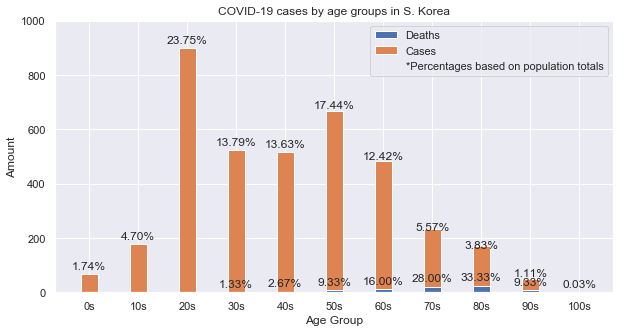

In [98]:
from matplotlib.patches import Rectangle
not_dead = age_tot_dead[:,0]-age_tot_dead[:,1]
deads = age_tot_dead[:,1]
width = 0.35 

fig, ax = plt.subplots(figsize=(10,5))


deadPlot = ax.bar(ages, deads, width, label='Deaths')
totalPlot = ax.bar(ages, not_dead, width, bottom=age_tot_dead[:,1], label='Total Cases')

ax.set_xlabel('Age Group')
ax.set_ylabel('Amount')
ax.set_title('COVID-19 cases by age groups in S. Korea')


plt.ylim([0,1000])
  

total = sum(age_tot_dead[:,0])
totalD = sum(deads)

  
def autolabel(rects, t):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        percentage = "{:.2%}".format(height/t)
        if height == 0: continue
        ax.annotate(percentage,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        


autolabel(deadPlot, totalD)
autolabel(totalPlot, total)

extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
ax.legend([deadPlot, totalPlot, extra], ('Deaths', 'Cases','*Percentages based on population totals'))


plt.show()

In [20]:
timeDF = pd.read_csv('Time.csv')
timeDF.date = pd.to_datetime(timeDF.date, infer_datetime_format=False)  
timeDF.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


# Plotting the ratio of case type to total tested to understand the curve better


Text(0.5,1,'Percent of patients who tested positive out of total tested that day')

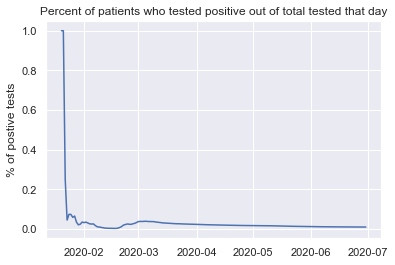

In [21]:
ratio = timeDF['confirmed']/timeDF['test']
plt.plot(timeDF['date'], ratio)
plt.ylabel("% of postive tests")
plt.title('Percent of patients who tested positive out of total tested that day')

Text(0.5,1,'Percent of patients who died out of total tested that day')

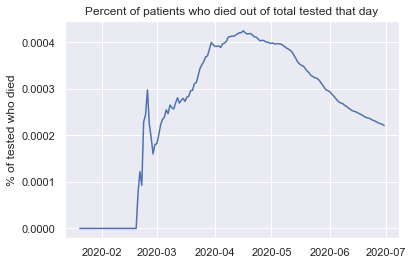

In [170]:
ratio = timeDF['deceased']/timeDF['test']
plt.plot(timeDF['date'], ratio)
plt.ylabel("% of tested who died")
plt.title('Percent of patients who died out of total tested that day')

Text(0,0.5,'Number of patients (normalized)')

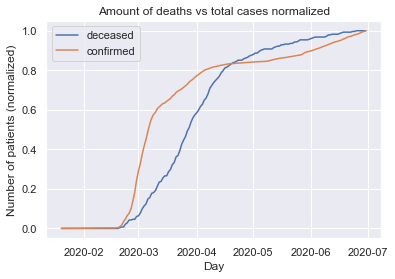

In [23]:
sns.set(style="darkgrid")
plt.plot(timeDF['date'], timeDF['deceased']/max(timeDF['deceased']))
plt.plot(timeDF['date'], timeDF['confirmed']/max(timeDF['confirmed']))
plt.legend()
plt.title('Amount of deaths vs total cases normalized')
plt.xlabel('Day')
plt.ylabel('Number of patients (normalized)')

In [129]:
pd.set_option('display.max_rows', 35)
policyDF = pd.read_csv('Policy.csv')
policyDF.head()

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN
5,6,Korea,Immigration,Special Immigration Procedure,from Hong Kong,2020-02-12,NaN
6,7,Korea,Immigration,Special Immigration Procedure,from Macau,2020-02-12,NaN
7,8,Korea,Immigration,Special Immigration Procedure,from Japan,2020-03-09,NaN
8,9,Korea,Immigration,Special Immigration Procedure,from Italy,2020-03-12,NaN
9,10,Korea,Immigration,Special Immigration Procedure,from Iran,2020-03-12,NaN


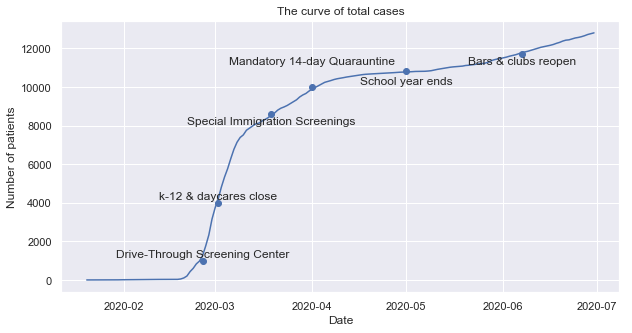

In [142]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(10,5))

xs = timeDF['date']
ys = timeDF['confirmed']

xsP = policyDF['start_date']
details = policyDF['detail']



plt.plot(xs, ys)
plt.title('The curve of total cases')
plt.xlabel("Date")
plt.ylabel('Number of patients')
plt.scatter('2020-05-01',10800, color='b')
# plt.annotate("School lets out", xy = ()'2020-05-01',12))
ax.annotate("School year ends",
                    xy=('2020-05-01', 10000),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center')#, va='bottom')

plt.scatter('2020-04-01',10000, color='b')
# plt.annotate("Mandatory 14-day Quarauntine", xy = ()'2020-05-01',12))
ax.annotate("Mandatory 14-day Quarauntine",
                    xy=('2020-04-01', 11000),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center')#, va='bottom')


plt.scatter('2020-03-02',4000, color='b')
# plt.scatter('2020-03-16',4000, color='b')
ax.annotate("k-12 & daycares close",
                    xy=('2020-03-02', 4000),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center')#, va='bottom')

plt.scatter('2020-06-07',11700, color='b')
ax.annotate("Bars & clubs reopen",
                    xy=('2020-06-07', 11000),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center')#, va='bottom')


plt.scatter('2020-02-26',1000, color='b')
ax.annotate("Drive-Through Screening Center",
                    xy=('2020-02-26', 1000),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center')#, va='bottom')

plt.scatter('2020-03-19',8600, color='b')
ax.annotate("Special Immigration Screenings",
                    xy=('2020-03-19', 7900),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center')#, va='bottom')





plt.show()

In [47]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(10,5))

xs = timeDF['date']
ys = timeDF['confirmed']

xsP = policyDF['start_date']
details = policyDF['detail']



plt.plot(xs, ys)
plt.title('The curve of total cases')
plt.xlabel("Date")
plt.ylabel('Number of patients')





for d in policyDF['start_date']:
    x = d
    y = timeDF.loc[timeDF['date'] == x, '']
    






plt.scatter('2020-05-01',10800)
# plt.annotate("School lets out", xy = ()'2020-05-01',12))
ax.annotate("School lets out",
                    xy=('2020-05-01', 11000),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center')#, va='bottom')

plt.scatter('2020-04-01',10800)
# plt.annotate("Mandatory 14-day Quarauntine", xy = ()'2020-05-01',12))
ax.annotate("Mandatory 14-day Quarauntine",
                    xy=('2020-04-01', 11000),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center')#, va='bottom')

'2020-04-01'

plt.show()

IndentationError: expected an indented block (<ipython-input-47-af73f53220fa>, line 28)

object


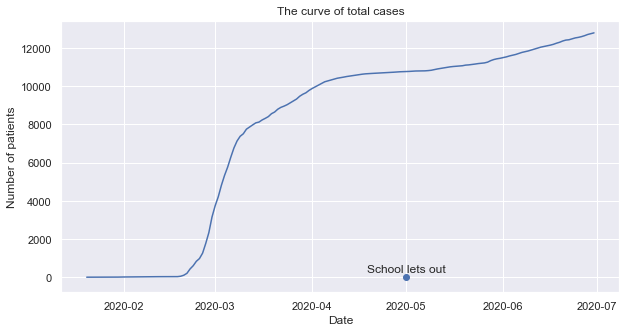

In [28]:
from datetime import datetime
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(10,5))

xs = timeDF['date'].values
ys = timeDF['confirmed'].values

xsP = policyDF['start_date'].values
details = policyDF['detail']




plt.plot(xs, ys)
plt.title('The curve of total cases')
plt.xlabel("Date")
plt.ylabel('Number of patients')
plt.scatter('2020-05-01',12)
# plt.annotate("School lets out", xy = ()'2020-05-01',12))
ax.annotate("School lets out",
                    xy=('2020-05-01', 12),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


for x,y in zip(xs, ys):

    label = "{:.2f}".format(y)
    if x in xsP:
        print('++')
        label = policyDF.loc[policyDF.start_date == x, 'detail'].iloc[0]
        plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
        
print(xsP.dtype)
# def convert_datetime(dt):
#     for d in dt:
#         d = datetime.strftime(d, '%Y-%m-%d %H:%M-%S')
#     return dt

# convert_datetime(xsP)
# print(xsP)

plt.show()

C:\Users\apetr\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1823: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


Text(0.5,0,'Days since January 20th 2020')

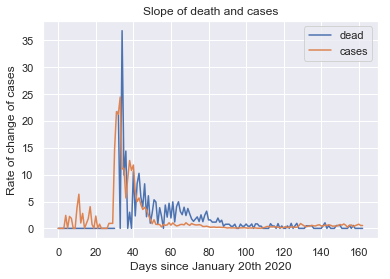

In [171]:
ind = pd.Series(range(0,163))

transformx = ind.apply(np.log10)
dead_y = timeDF['deceased'].apply(np.log10)
cases_y = timeDF['confirmed'].apply(np.log10)

denom = transformx.diff()
num_dead = dead_y.diff()
num_cases = cases_y.diff()
dead_slope = (num_dead / denom).fillna(0)
cases_slope = (num_cases / denom).fillna(0)

# plt.plot(ages, dead_slope)
# plt.plot(ages, cases_slope)

dead_slope.plot.line(label='dead')
cases_slope.plot.line(label='cases')
plt.title('Slope of death and cases')
plt.legend()
plt.ylabel('Rate of change of cases')
plt.xlabel('Days since January 20th 2020')


In [30]:
age_tot_dead = []
ages = np.array(['0s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s', '100s'])

for i,a in enumerate(ages):
    temp = []
    d = patDF.loc[np.logical_and(patDF.age == a, patDF.state == 'deceased')].state.value_counts()
#     c = patDF.loc[np.logical_and(patDF.age == a, patDF.state == 'confirmed')].state.value_counts()
    
    c = patDF.loc[patDF.age == a].age.value_counts()[0]
    
#     temp.append(a)
    temp.append(int(c))
    if not d.empty: 
        temp.append(int(d[0]))
    else:
        temp.append(0)
    age_tot_dead.append(temp)
    
        
age_tot_dead = np.array(age_tot_dead)
age_tot_dead   
    
    

array([[ 66,   0],
       [178,   0],
       [899,   0],
       [523,   1],
       [518,   2],
       [667,   7],
       [482,  12],
       [232,  21],
       [170,  25],
       [ 49,   7],
       [  1,   0]])

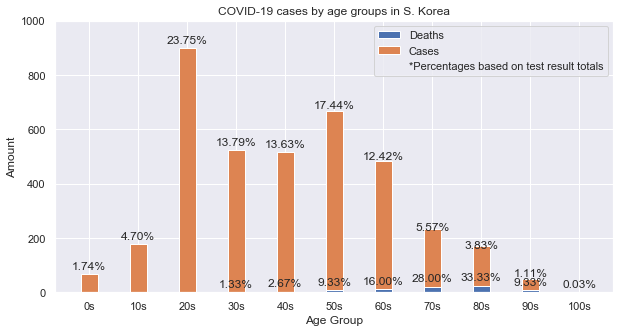

In [31]:
from matplotlib.patches import Rectangle
not_dead = age_tot_dead[:,0]-age_tot_dead[:,1]
deads = age_tot_dead[:,1]
width = 0.35 

fig, ax = plt.subplots(figsize=(10,5))


deadPlot = ax.bar(ages, deads, width, label='Deaths')
totalPlot = ax.bar(ages, not_dead, width, bottom=age_tot_dead[:,1], label='Total Cases')

ax.set_xlabel('Age Group')
ax.set_ylabel('Amount')
ax.set_title('COVID-19 cases by age groups in S. Korea')


plt.ylim([0,1000])
  

total = sum(age_tot_dead[:,0])
totalD = sum(deads)

  
def autolabel(rects, t):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        percentage = "{:.2%}".format(height/t)
        if height == 0: continue#percentage = '0%'
        ax.annotate(percentage,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        


autolabel(deadPlot, totalD)
autolabel(totalPlot, total)

extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
ax.legend([deadPlot, totalPlot, extra], ('Deaths', 'Cases','*Percentages based on test result totals'))


plt.show()

# Plotting cases of COVID on a map of South Korea

In [32]:
mapDF = locationDF[['province', 'city', 'latitude', 'longitude', 'confirmed']]
mapDF.head()


,province,city,latitude,longitude,confirmed
0,Seoul,Yongsan-gu,37.538621,126.992652,139
1,Seoul,Gwanak-gu,37.48208,126.901384,119
2,Seoul,Guro-gu,37.508163,126.884387,95
3,Seoul,Yangcheon-gu,37.546061,126.874209,43
4,Seoul,Dobong-gu,37.679422,127.044374,43


In [33]:
mapDF = mapDF[pd.to_numeric(mapDF['latitude'], errors='coerce').notnull()]
mapDF = mapDF[pd.to_numeric(mapDF['longitude'], errors='coerce').notnull()]

mapDF['latitude'] = pd.to_numeric(mapDF['latitude'])
mapDF['longitude'] = pd.to_numeric(mapDF['longitude'])
mapDF.dtypes

province      object
city          object
latitude     float64
longitude    float64
confirmed      int64
dtype: object

In [34]:
address = 'South Korea'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of South Korea is {}, {}.'.format(latitude, longitude))

The geograpical coordinate of South Korea is 36.638392, 127.6961188.


In [123]:
map_korea = folium.Map(location=[latitude, longitude], zoom_start=7)
map_korea

In [36]:
for lat, lng, city, prov, cases in zip(mapDF['latitude'], mapDF['longitude'], mapDF['city'], mapDF['province'], mapDF['confirmed']):
    label = '{} confirmed cases in {}, {}'.format(cases, city, prov)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_korea)  
    
map_korea